In [42]:
#Reader for Suicide File
import pandas as pd
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

# main suicide csv load and clean-up
csv_path = "../Resources/reviseddata.csv"
suicide_df = pd.read_csv(csv_path, low_memory=False)
suicide_df2 = suicide_df.dropna()
suicide_df2
# happiness df load by year
csv_path = "../Resources/Happiness_Reports/2015.csv"
happy15_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "../Resources/Happiness_Reports/2016.csv"
happy16_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "../Resources/Happiness_Reports/2017.csv"
happy17_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "../Resources/Happiness_Reports/2018.csv"
happy18_df = pd.read_csv(csv_path, low_memory=False)

# put suffix on columns
happy15_df.columns = happy15_df.columns.map(lambda x: str(x) + "_15")
happy16_df.columns = happy16_df.columns.map(lambda x: str(x) + "_16")
happy17_df.columns = happy17_df.columns.map(lambda x: str(x) + "_17")
happy18_df.columns = happy18_df.columns.map(lambda x: str(x) + "_18")

# merge df's into one
merge_df = pd.merge(suicide_df2, happy15_df, left_on='Country Name',right_on='Country_15', suffixes=('suicide15','happy15'))
merge_df2 = pd.merge(merge_df, happy16_df, left_on='Country Name',right_on='Country_16', suffixes=('suicide16','happy16'))
merge_df3 = pd.merge(merge_df2, happy17_df, left_on='Country Name',right_on='Country_17', suffixes=('suicide17','happy17'))
merge_df4 = pd.merge(merge_df3, happy18_df, left_on='Country Name',right_on='Country or region_18', suffixes=('suicide18','happy18'))

# list of columns to rearrange
pops=[ '2015', '2016', '2017', '2018','Country_15',
 'Region_15',
 'Happiness Rank_15',
 'Happiness Score_15',
 'Standard Error_15',
 'Economy (GDP per Capita)_15',
 'Family_15',
 'Health (Life Expectancy)_15',
 'Freedom_15',
 'Trust (Government Corruption)_15',
 'Generosity_15',
 'Dystopia Residual_15',
 'Country_16',
 'Region_16',
 'Happiness Rank_16',
 'Happiness Score_16',
 'Lower Confidence Interval_16',
 'Upper Confidence Interval_16',
 'Economy (GDP per Capita)_16',
 'Family_16',
 'Health (Life Expectancy)_16',
 'Freedom_16',
 'Trust (Government Corruption)_16',
 'Generosity_16',
 'Dystopia Residual_16',
 'Country_17',
 'Happiness.Rank_17',
 'Happiness.Score_17',
 'Whisker.high_17',
 'Whisker.low_17',
 'Economy..GDP.per.Capita._17',
 'Family_17',
 'Health..Life.Expectancy._17',
 'Freedom_17',
 'Generosity_17',
 'Trust..Government.Corruption._17',
 'Dystopia.Residual_17',
 'Overall rank_18',
 'Country or region_18',
 'Score_18',
 'GDP per capita_18',
 'Social support_18',
 'Healthy life expectancy_18',
 'Freedom to make life choices_18',
 'Generosity_18',
 'Perceptions of corruption_18']
cols = list(merge_df4.columns.values)

# pop columns
for col in pops:
       cols.pop(cols.index(col))

#return to correct order
mergedfinaldf = merge_df4[cols+['2015', 'Country_15',
 'Region_15',
 'Happiness Rank_15',
 'Happiness Score_15',
 'Standard Error_15',
 'Economy (GDP per Capita)_15',
 'Family_15',
 'Health (Life Expectancy)_15',
 'Freedom_15',
 'Trust (Government Corruption)_15',
 'Generosity_15',
 'Dystopia Residual_15','2016','Country_16',
 'Region_16',
 'Happiness Rank_16',
 'Happiness Score_16',
 'Lower Confidence Interval_16',
 'Upper Confidence Interval_16',
 'Economy (GDP per Capita)_16',
 'Family_16',
 'Health (Life Expectancy)_16',
 'Freedom_16',
 'Trust (Government Corruption)_16',
 'Generosity_16',
 'Dystopia Residual_16','2017', 'Country_17',
 'Happiness.Rank_17',
 'Happiness.Score_17',
 'Whisker.high_17',
 'Whisker.low_17',
 'Economy..GDP.per.Capita._17',
 'Family_17',
 'Health..Life.Expectancy._17',
 'Freedom_17',
 'Generosity_17',
 'Trust..Government.Corruption._17',
 'Dystopia.Residual_17','2018',
 'Overall rank_18',
 'Country or region_18',
 'Score_18',
 'GDP per capita_18',
 'Social support_18',
 'Healthy life expectancy_18',
 'Freedom to make life choices_18',
 'Generosity_18',
 'Perceptions of corruption_18']]




# individual years
merged2015df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2015df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2015_Suicides/100k', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15']
merged2016df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2016df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2016_Suicides/100k', 'Country_16', 'Region_16', 'Happiness Rank_16',
       'Happiness Score_16', 'Lower Confidence Interval_16',
       'Upper Confidence Interval_16', 'Economy (GDP per Capita)_16',
       'Family_16', 'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16']
merged2017df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2017df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2017_Suicides/100k', 'Country_17', 'Happiness.Rank_17', 'Happiness.Score_17',
       'Whisker.high_17', 'Whisker.low_17', 'Economy..GDP.per.Capita._17',
       'Family_17', 'Health..Life.Expectancy._17', 'Freedom_17',
       'Generosity_17', 'Trust..Government.Corruption._17',
       'Dystopia.Residual_17']
merged2018df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17'],axis=1)
merged2018df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2018_Suicides/100k', 'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18']
mergedfinalfiltered = mergedfinaldf.drop(['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019'],axis=1)
# suicide filtered file
suicide_filtered = suicide_df2.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019'],axis=1)


dflist = ['mergedfinaldf','merged2015df','merged2016df','merged2017df','merged2018df','mergedfinalfiltered','suicide_filtered']



In [43]:
import pandas as pd

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
mergedfinalfiltered.describe()

,2015,Happiness Rank_15,Happiness Score_15,Standard Error_15,Economy (GDP per Capita)_15,Family_15,Health (Life Expectancy)_15,Freedom_15,Trust (Government Corruption)_15,Generosity_15,Dystopia Residual_15,2016,Happiness Rank_16,Happiness Score_16,Lower Confidence Interval_16,Upper Confidence Interval_16,Economy (GDP per Capita)_16,Family_16,Health (Life Expectancy)_16,Freedom_16,Trust (Government Corruption)_16,Generosity_16,Dystopia Residual_16,2017,Happiness.Rank_17,Happiness.Score_17,Whisker.high_17,Whisker.low_17,Economy..GDP.per.Capita._17,Family_17,Health..Life.Expectancy._17,Freedom_17,Generosity_17,Trust..Government.Corruption._17,Dystopia.Residual_17,2018,Overall rank_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,128.000000
mean,9.393798,76.837209,5.447372,0.045648,0.867420,1.011128,0.650690,0.437533,0.145647,0.238958,2.096021,9.159690,76.930233,5.438155,5.344341,5.531969,0.972141,0.813493,0.568417,0.380121,0.140670,0.243500,2.319812,8.986047,74.372093,5.450101,5.542920,5.357282,1.010890,1.217567,0.570475,0.420169,0.249052,0.128255,1.853658,8.876744,74.480620,5.483550,0.918109,1.241256,0.618504,0.464605,0.182395,0.115555
std,5.998525,46.545138,1.170405,0.015565,0.398616,0.268469,0.233373,0.153647,0.123640,0.128646,0.532678,5.788222,46.510783,1.171855,1.179113,1.165295,0.409581,0.265561,0.226964,0.144666,0.115332,0.135307,0.527599,5.718593,45.437813,1.141504,1.131594,1.152119,0.410118,0.264707,0.224491,0.150484,0.138437,0.106387,0.501826,5.416158,45.584246,1.125525,0.383483,0.282185,0.234770,0.162401,0.101961,0.100926
min,1.500000,1.000000,2.839000,0.018480,0.015300,0.139950,0.000000,0.000000,0.000000,0.000000,0.670420,1.500000,1.000000,2.905000,2.732000,3.078000,0.068310,0.000000,0.000000,0.000000,0.000000,0.000000,0.916810,0.600000,1.000000,2.905000,3.074690,2.735310,0.091623,0.431883,0.005565,0.000000,0.000000,0.000000,0.377914,1.600000,1.000000,2.905000,0.076000,0.372000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,35.000000,4.565000,0.036080,0.594480,0.885880,0.514660,0.339160,0.062320,0.145740,1.785550,5.100000,34.000000,4.415000,4.351000,4.508000,0.691770,0.663660,0.404570,0.279960,0.061260,0.156260,2.044970,5.000000,34.000000,4.535000,4.622591,4.450308,0.728871,1.083096,0.409363,0.325708,0.158466,0.059308,1.612326,5.100000,34.000000,4.500000,0.657000,1.094000,0.454000,0.367000,0.110000,0.050750
50%,7.400000,76.000000,5.332000,0.043170,0.920530,1.043560,0.720250,0.449740,0.107130,0.216840,2.085280,7.700000,78.000000,5.389000,5.295000,5.483000,1.034370,0.867580,0.620070,0.402850,0.106130,0.220400,2.280850,7.100000,73.000000,5.395000,5.545335,5.298430,1.079374,1.271463,0.625131,0.447552,0.230947,0.091066,1.826705,7.600000,73.000000,5.483000,0.979000,1.301000,0.671000,0.503000,0.172000,0.082000
75%,13.000000,117.000000,6.411000,0.050130,1.159910,1.227910,0.816580,0.554990,0.180600,0.322960,2.451760,12.200000,117.000000,6.379000,6.288000,6.552000,1.279640,1.031430,0.735610,0.489270,0.179140,0.311850,2.664650,12.100000,115.000000,6.403000,6.509117,6.334945,1.320879,1.428939,0.735081,0.536747,0.326662,0.163761,2.172410,11.700000,115.000000,6.343000,1.200000,1.471000,0.790000,0.584000,0.243000,0.139000
max,34.900000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,32.800000,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.947190,0.608480,0.505210,0.819710,3.559060,29.700000,154.000000,7.5370

In [46]:
mergedfinalfiltered

,Country Name,Country Code,Indicator Name,Indicator Code,Total,Max,Min,Avg,2015,Country_15,Region_15,Happiness Rank_15,Happiness Score_15,Standard Error_15,Economy (GDP per Capita)_15,Family_15,Health (Life Expectancy)_15,Freedom_15,Trust (Government Corruption)_15,Generosity_15,Dystopia Residual_15,2016,Country_16,Region_16,Happiness Rank_16,Happiness Score_16,Lower Confidence Interval_16,Upper Confidence Interval_16,Economy (GDP per Capita)_16,Family_16,Health (Life Expectancy)_16,Freedom_16,Trust (Government Corruption)_16,Generosity_16,Dystopia Residual_16,2017,Country_17,Happiness.Rank_17,Happiness.Score_17,Whisker.high_17,Whisker.low_17,Economy..GDP.per.Capita._17,Family_17,Health..Life.Expectancy._17,Freedom_17,Generosity_17,Trust..Government.Corruption._17,Dystopia.Residual_17,2018,Overall rank_18,Country or region_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
0,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,89.2,5,3.9,4.46,4.0,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,4.0,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,4.1,Afghanistan,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,4.1,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,146.2,8.8,6,7.31,6.5,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,6.2,Angola,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,6.0,Angola,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,6.0,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061
2,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,117.5,8.2,4.3,5.88,4.8,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,4.7,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,4.7,Albania,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,4.5,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
3,United Arab Emirates,ARE,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,151.4,8.6,5.6,7.57,6.5,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,6.0,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507,5.6,United Arab Emirates,21,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704,6.0,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN
4,Argentina,ARG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,177.8,10.3,8.3,8.89,8.3,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,8.3,Argentina,Latin America and Caribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,8.9,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,9.2,29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Uzbekistan,UZB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,177.5,10.1,8,8.88,9.2,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,9.1,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1

In [47]:
mergedfinalfiltered.to_csv('../Resources/mergedfinalfiltered.csv', index = False)

In [48]:
mergedfinalfiltered.loc[mergedfinalfiltered['2015'] == 34.9]

,Country Name,Country Code,Indicator Name,Indicator Code,Total,Max,Min,Avg,2015,Country_15,Region_15,Happiness Rank_15,Happiness Score_15,Standard Error_15,Economy (GDP per Capita)_15,Family_15,Health (Life Expectancy)_15,Freedom_15,Trust (Government Corruption)_15,Generosity_15,Dystopia Residual_15,2016,Country_16,Region_16,Happiness Rank_16,Happiness Score_16,Lower Confidence Interval_16,Upper Confidence Interval_16,Economy (GDP per Capita)_16,Family_16,Health (Life Expectancy)_16,Freedom_16,Trust (Government Corruption)_16,Generosity_16,Dystopia Residual_16,2017,Country_17,Happiness.Rank_17,Happiness.Score_17,Whisker.high_17,Whisker.low_17,Economy..GDP.per.Capita._17,Family_17,Health..Life.Expectancy._17,Freedom_17,Generosity_17,Trust..Government.Corruption._17,Dystopia.Residual_17,2018,Overall rank_18,Country or region_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
70,Lithuania,LTU,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,759.6,50.1,26.1,37.98,34.9,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649,32.8,Lithuania,Central and Eastern Europe,60,5.813,5.734,5.892,1.2692,1.06411,0.64674,0.18929,0.0182,0.02025,2.60525,29.7,Lithuania,52,5.902,5.98267,5.82133,1.314582,1.473516,0.62895,0.234232,0.010165,0.011866,2.228441,27.4,50,Lithuania,5.952,1.197,1.527,0.716,0.35,0.026,0.006


# Happiness score, GDP per capita, Suicide Rates (per 100,000) by regions

In [49]:
# looking the average happiness score by regions
# Region_15 is the same as Region_16, if posible, we can drop one of those column

region_happiness = mergedfinalfiltered[['Region_15', 'Happiness Score_15',
                                  'Happiness Score_16','Happiness.Score_17','Score_18']]
region_happiness['15 to 18 Average'] = region_happiness.mean(axis=1)

ave_region_happiness = region_happiness.groupby(['Region_15']).mean()
ave_region_happiness = ave_region_happiness.sort_values('15 to 18 Average')
ave_region_happiness

<ipython-input-49-b74b7d28f55f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_happiness['15 to 18 Average'] = region_happiness.mean(axis=1)


,Happiness Score_15,Happiness Score_16,Happiness.Score_17,Score_18,15 to 18 Average
Region_15,,,,,
Sub-Saharan Africa,4.138500,4.063367,4.108267,4.204867,4.128750
Southern Asia,4.580857,4.563286,4.628429,4.603857,4.594107
Central and Eastern Europe,5.294250,5.337875,5.390375,5.437250,5.364937
Eastern Asia,5.333667,5.357667,5.382667,5.428667,5.375667
Southeastern Asia,5.372625,5.396750,5.444875,5.399750,5.403500
Middle East and Northern Africa,5.757643,5.829500,5.769071,5.691857,5.762018
Latin America and Caribbean,6.101895,6.048737,5.984105,5.997316,6.033013
Western Europe,6.739350,6.731400,6.748400,6.829100,6.762063
North America,7.273000,7.254000,7.154500,7.107000,7.197125


In [50]:
ave_region_happiness.reset_index()

,Region_15,Happiness Score_15,Happiness Score_16,Happiness.Score_17,Score_18,15 to 18 Average
0,Sub-Saharan Africa,4.138500,4.063367,4.108267,4.204867,4.128750
1,Southern Asia,4.580857,4.563286,4.628429,4.603857,4.594107
2,Central and Eastern Europe,5.294250,5.337875,5.390375,5.437250,5.364937
3,Eastern Asia,5.333667,5.357667,5.382667,5.428667,5.375667
4,Southeastern Asia,5.372625,5.396750,5.444875,5.399750,5.403500
5,Middle East and Northern Africa,5.757643,5.829500,5.769071,5.691857,5.762018
6,Latin America and Caribbean,6.101895,6.048737,5.984105,5.997316,6.033013
7,Western Europe,6.739350,6.731400,6.748400,6.829100,6.762063
8,North America,7.273000,7.254000,7.154500,7.107000,7.197125
9,Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.301375


In [51]:
# look at the GDP of the region
# Screenshot

region_GDP_percap = mergedfinalfiltered[['Region_15', 'Economy (GDP per Capita)_15', "Economy (GDP per Capita)_16",
                     'Economy..GDP.per.Capita._17', 'GDP per capita_18']]
region_GDP_percap['15 to 18 Average'] = region_GDP_percap.mean(axis=1)

ave_region_GDPpercap = region_GDP_percap.groupby(['Region_15']).mean()
ave_region_GDPpercap = ave_region_GDPpercap.sort_values('15 to 18 Average')
ave_region_GDPpercap

<ipython-input-51-91f3381bbaa6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_GDP_percap['15 to 18 Average'] = region_GDP_percap.mean(axis=1)


,Economy (GDP per Capita)_15,Economy (GDP per Capita)_16,Economy..GDP.per.Capita._17,GDP per capita_18,15 to 18 Average
Region_15,,,,,
Sub-Saharan Africa,0.398602,0.492799,0.530815,0.469133,0.472837
Southern Asia,0.560486,0.660671,0.697479,0.625143,0.635945
Southeastern Asia,0.813854,0.923376,0.965253,0.915750,0.904558
Latin America and Caribbean,0.844133,0.950000,0.987148,0.884368,0.916412
Central and Eastern Europe,0.951245,1.057724,1.102084,0.999417,1.027618
Eastern Asia,0.996350,1.132133,1.175106,1.065667,1.092314
Middle East and Northern Africa,1.162886,1.255628,1.283608,1.201786,1.225977
Australia and New Zealand,1.291880,1.402545,1.445060,1.304000,1.360871
Western Europe,1.303122,1.422338,1.462936,1.325650,1.378512


In [52]:
ave_region_GDPpercap.reset_index()

,Region_15,Economy (GDP per Capita)_15,Economy (GDP per Capita)_16,Economy..GDP.per.Capita._17,GDP per capita_18,15 to 18 Average
0,Sub-Saharan Africa,0.398602,0.492799,0.530815,0.469133,0.472837
1,Southern Asia,0.560486,0.660671,0.697479,0.625143,0.635945
2,Southeastern Asia,0.813854,0.923376,0.965253,0.915750,0.904558
3,Latin America and Caribbean,0.844133,0.950000,0.987148,0.884368,0.916412
4,Central and Eastern Europe,0.951245,1.057724,1.102084,0.999417,1.027618
5,Eastern Asia,0.996350,1.132133,1.175106,1.065667,1.092314
6,Middle East and Northern Africa,1.162886,1.255628,1.283608,1.201786,1.225977
7,Australia and New Zealand,1.291880,1.402545,1.445060,1.304000,1.360871
8,Western Europe,1.303122,1.422338,1.462936,1.325650,1.378512
9,North America,1.360400,1.474055,1.512732,1.364000,1.427797


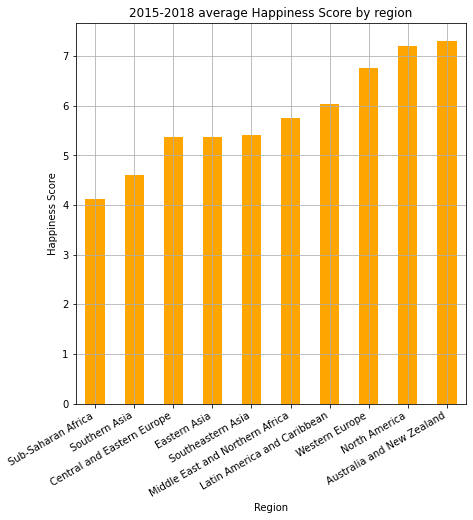

In [53]:
ave_region_happiness.plot(kind='bar', y='15 to 18 Average', color='orange', grid=True, figsize=(7,7),
                         title="2015-2018 average Happiness Score by region", legend=None)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel('Happiness Score')
plt.xlabel('Region')
plt.savefig('2015-2018 average Happiness Score by region.png',dpi=300, bbox_inches = "tight")

In [54]:

happiness_vs_GDP = pd.merge(ave_region_happiness,ave_region_GDPpercap, on='Region_15', how='right')
happiness_vs_GDP = happiness_vs_GDP.drop(columns=['Happiness Score_15', 'Happiness Score_16', 'Happiness.Score_17', 'Score_18',
                                                 'Economy (GDP per Capita)_15', 'Economy (GDP per Capita)_16', 'Economy..GDP.per.Capita._17', 'GDP per capita_18' ])
happiness_vs_GDP = happiness_vs_GDP.rename(columns= {'15 to 18 Average_x': '2015-2018 Average Happiness Score', '15 to 18 Average_y':'2015-2018 Average GDP Rate'})
happiness_vs_GDP = happiness_vs_GDP.sort_values(by=['2015-2018 Average Happiness Score'], ascending=False)
happiness_vs_GDP

,2015-2018 Average Happiness Score,2015-2018 Average GDP Rate
Region_15,,
Australia and New Zealand,7.301375,1.360871
North America,7.197125,1.427797
Western Europe,6.762063,1.378512
Latin America and Caribbean,6.033013,0.916412
Middle East and Northern Africa,5.762018,1.225977
Southeastern Asia,5.403500,0.904558
Eastern Asia,5.375667,1.092314
Central and Eastern Europe,5.364937,1.027618
Southern Asia,4.594107,0.635945


In [55]:
happiness_vs_GDP.reset_index()


,Region_15,2015-2018 Average Happiness Score,2015-2018 Average GDP Rate
0,Australia and New Zealand,7.301375,1.360871
1,North America,7.197125,1.427797
2,Western Europe,6.762063,1.378512
3,Latin America and Caribbean,6.033013,0.916412
4,Middle East and Northern Africa,5.762018,1.225977
5,Southeastern Asia,5.403500,0.904558
6,Eastern Asia,5.375667,1.092314
7,Central and Eastern Europe,5.364937,1.027618
8,Southern Asia,4.594107,0.635945
9,Sub-Saharan Africa,4.128750,0.472837


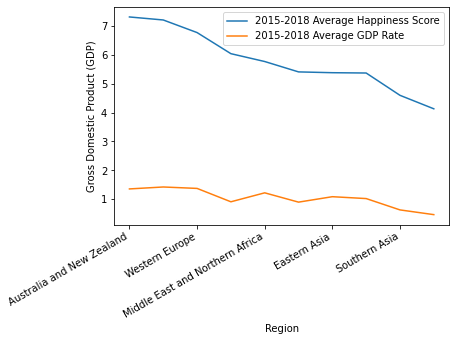

In [56]:
ax = plt.gca()

happiness_vs_GDP.plot(kind='line', y=['2015-2018 Average Happiness Score','2015-2018 Average GDP Rate'], ax=ax)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel('Gross Domestic Product (GDP)')
plt.xlabel('Region')
plt.show()

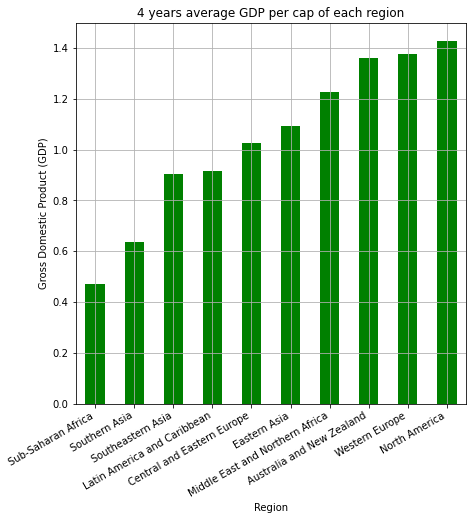

In [57]:
ave_region_GDPpercap.plot(kind='bar', y='15 to 18 Average', grid=True, color="green", figsize=(7,7),
                          title="4 years average GDP per cap of each region", legend=None)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel('Gross Domestic Product (GDP)')
plt.xlabel('Region')
plt.savefig("4 years average GDP per cap of each region.png",dpi=300, bbox_inches = "tight")

In [58]:
happiness_vs_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Australia and New Zealand to Sub-Saharan Africa
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   2015-2018 Average Happiness Score  10 non-null     float64
 1   2015-2018 Average GDP Rate         10 non-null     float64
dtypes: float64(2)
memory usage: 240.0+ bytes


C:\Users\clytn\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


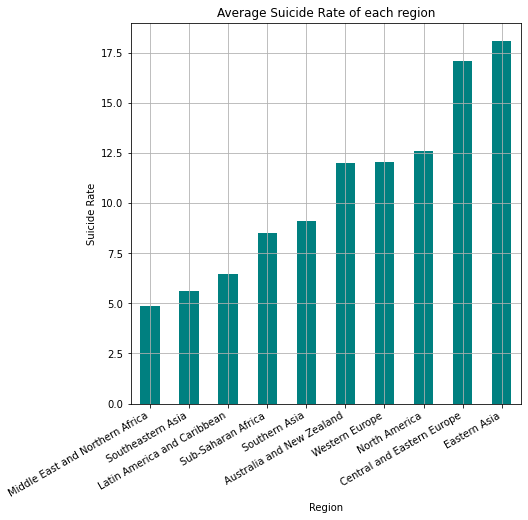

In [59]:
# the Average column is compiled from all of
# the periods from the original data frame
# not just from 2015 - 2018
suicide_rate_df = mergedfinalfiltered[['Region_15', 'Avg']] 

# the data inside Avg column were string type, I convert them back to numeric with to_numeric() function
suicide_rate_df.Avg = pd.to_numeric(suicide_rate_df.Avg)

# now I can use the mean() to look at the average suicide rate for the whole regions
avg_suicide_rate =suicide_rate_df.groupby(['Region_15']).mean()
avg_suicide_rate = avg_suicide_rate.sort_values('Avg')
avg_suicide_rate.plot(kind='bar', y='Avg', grid=True, color="teal", figsize=(7,7),
                          title="Average Suicide Rate of each region", legend=None)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel('Suicide Rate')
plt.xlabel('Region')
plt.savefig("Average Suicide Rate of each region.png",dpi=300, bbox_inches = "tight")

## Observations:
* I compute the average of the Happiness Score (HS) by regions and by the years (vertically and horizontally)
* I do the same for the GDP per capita
### First hand observation:
* looking on the graphs, the patterns of HS and GDP per cap are consistent with each other:
    1. Rank highest in HS are Australia and New Zeland, Western Europe, and North America; those 3 regions also rank highest in GDP per cap.
    2. Rank lowest in HS are Sub-Sahara Africa and Southern Asia, those regions also rank lowest in GDP per cap.
    3. About the Average suicide rate, it's interesting. 
        * The highest ranking are Eastern Asia, Central and Eastern Europe, North America
        * The Lowest ranking are Mid and Northern Africa, Southern Asian
* It seems that "richer" regions are also "happier", and also tend to be more "suicidal"
* Poorer regions aren't so happy, but have lower suicide rate

## Note: 
* Add median/mean bar of the whole world
* arrange the bar charts by accending order

# Happiness and GDP per cap, a deeper look at each country

In [60]:
# Setting up funciton to graph scatter plot and Regression line

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
def scater_regress(frame, x_column, y_column):
    rgb = np.random.rand(3,)

    
    (slope, intercept, r_value, p_value, stderr)= linregress(x_column, y_column)

    #set the regression equation to graph the line y = ax + b
    regression_value = x_column * slope + intercept
    #print out equ on the graph
    line_equ = "y = " + str(round(slope, 2)) + "x " + '+ ' + str(round(intercept,2))
    plt.figure(figsize=(8,8))
    plt.scatter(x_column, y_column, s=80, c=[rgb], marker="p")
    plt.plot(x_column, regression_value, "r")
    plt.annotate(line_equ, (.25,7) ,color=rgb, fontsize=15)
    print(f"the r value: {round(r_value, 6)}")

    
def boxplot_fig_suicide(column):
    fig, ax= plt.subplots()
    ax.boxplot(column)
    ax.set_ylabel("Suicide Rate")

## 2015 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.801363


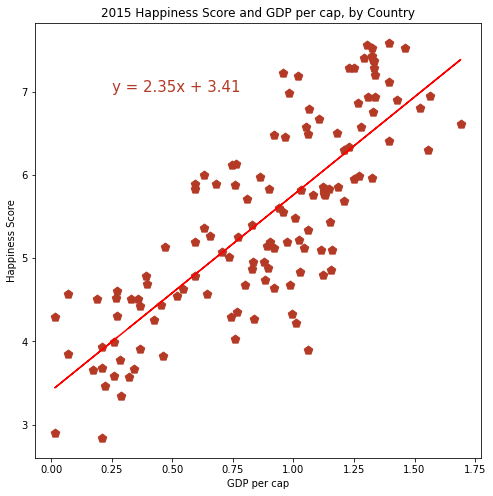

In [61]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_15'], 
               mergedfinalfiltered['Happiness Score_15'])
plt.title('2015 Happiness Score and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')
plt.savefig('2015 Happiness Score and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

## 2016 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.820505


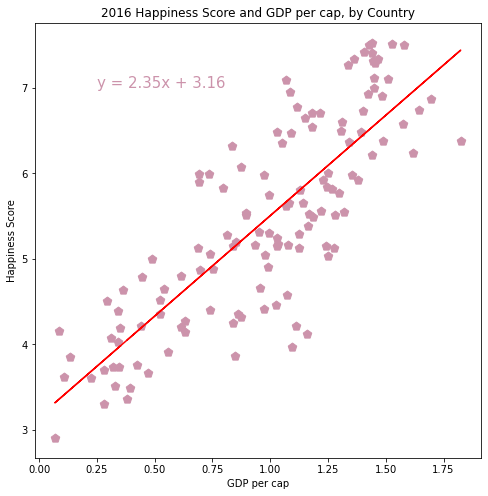

In [62]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_16'], 
               mergedfinalfiltered['Happiness Score_16'])
plt.title('2016 Happiness Score and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')
plt.savefig('2016 Happiness Score and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

## 2017 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.827939


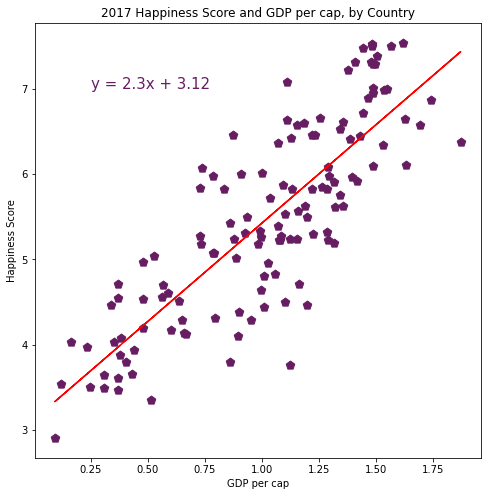

In [63]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy..GDP.per.Capita._17'], 
               mergedfinalfiltered['Happiness.Score_17'])
plt.title('2017 Happiness Score and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')
plt.savefig('2017 Happiness Score and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

## 2018 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.815095


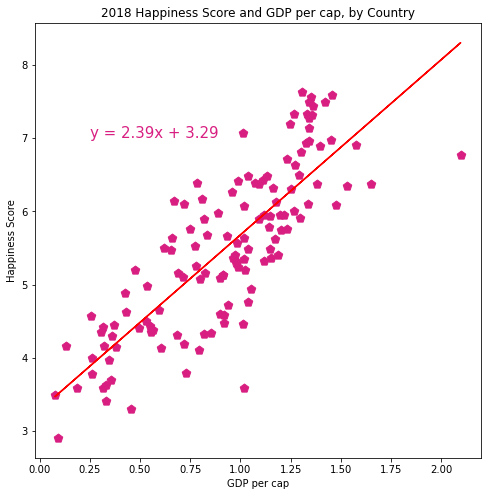

In [64]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['GDP per capita_18'], 
               mergedfinalfiltered['Score_18'])
plt.title('2018 Happiness Score and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')
plt.savefig('2018 Happiness Score and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

## Second Observation:
* Looking at the linear regression lines and the correlation coefficient (r-value):
    1. At each period (2015 to 2018), the correlation coefficients are above 0.8 (closing to 1), suggesting that there is a strong positive correlation between the Happiness and GDP per cap
    2. Regression lines show the trend of the data, all periods have an upward slope.

## Suicide Rate and Happiness Score Regression Line (by year)

the r value: 0.214671


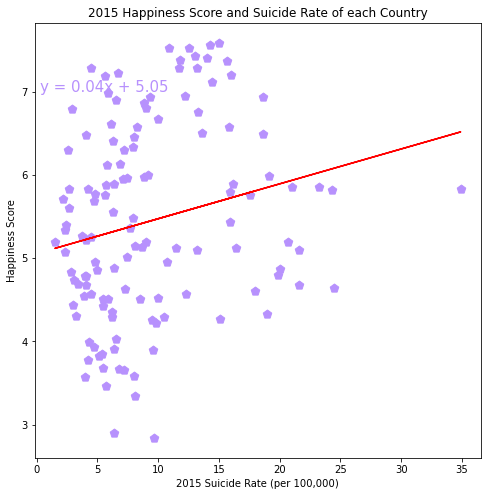

In [65]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2015'], 
               mergedfinalfiltered['Happiness Score_15'])
plt.title('2015 Happiness Score and Suicide Rate of each Country')
plt.xlabel('2015 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')
plt.savefig('2015 Happiness Score and Suicide Rate of each Country.png',dpi=300, bbox_inches = "tight")

the r value: 0.221952


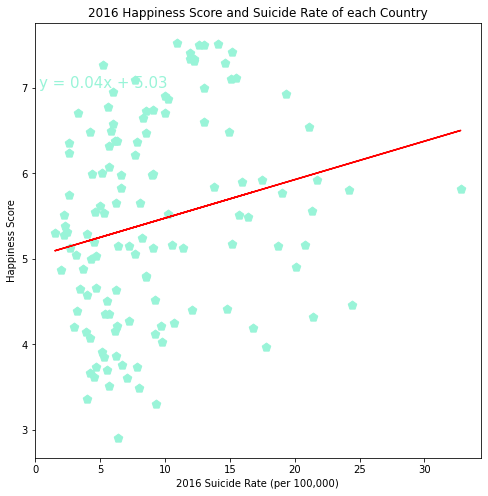

In [66]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2016'], 
               mergedfinalfiltered['Happiness Score_16'])
plt.title('2016 Happiness Score and Suicide Rate of each Country')
plt.xlabel('2016 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')
plt.savefig('2016 Happiness Score and Suicide Rate of each Country.png',dpi=300, bbox_inches = "tight")

the r value: 0.247268


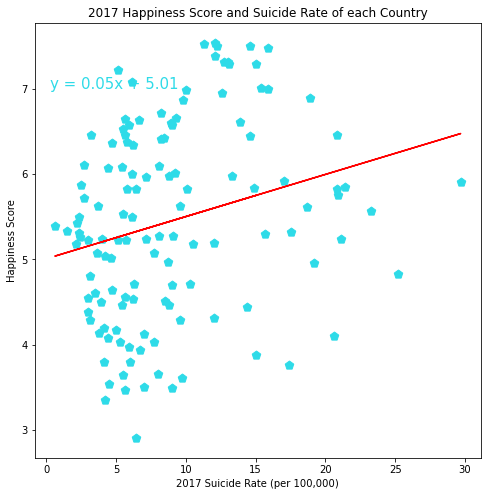

In [67]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2017'], 
               mergedfinalfiltered['Happiness.Score_17'])
plt.title('2017 Happiness Score and Suicide Rate of each Country')
plt.xlabel('2017 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')
plt.savefig('2017 Happiness Score and Suicide Rate of each Country.png',dpi=300, bbox_inches = "tight")

the r value: 0.259331


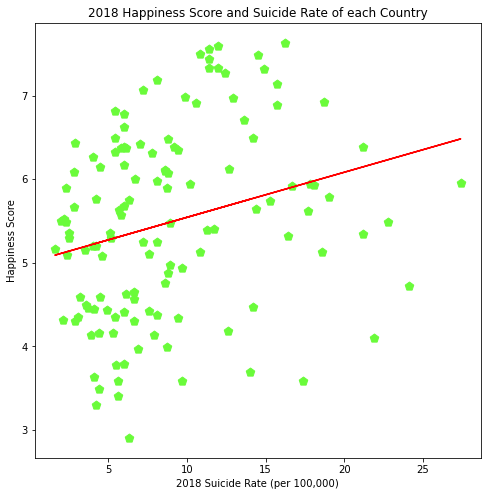

In [68]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2018'], 
               mergedfinalfiltered['Score_18'])
plt.title('2018 Happiness Score and Suicide Rate of each Country')
plt.xlabel('2018 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')
plt.savefig('2018 Happiness Score and Suicide Rate of each Country.png',dpi=300, bbox_inches = "tight")

## Observations about the correlation of Suicide Rate and Happiness score
* They have a positive correlation, it's a weak correlation (all 4 years has the r-value that is less than 0.3)
* Looking at the scatter plot, the data are pretty much spread out, they don't have any certain patterns

## Suicide Rate and GDP per cap Regression Lines (by year)

the r value: 0.335677


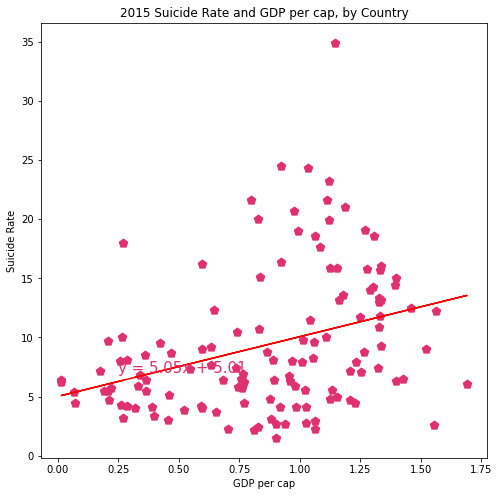

In [69]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_15'], 
               mergedfinalfiltered['2015'])
plt.title('2015 Suicide Rate and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')
plt.savefig('2015 Suicide Rate and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

the r value: 0.334945


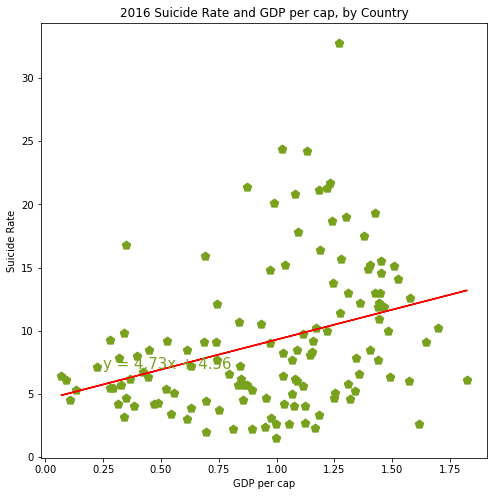

In [70]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_16'], 
               mergedfinalfiltered['2016'])
plt.title('2016 Suicide Rate and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')
plt.savefig('2016 Suicide Rate and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

the r value: 0.350782


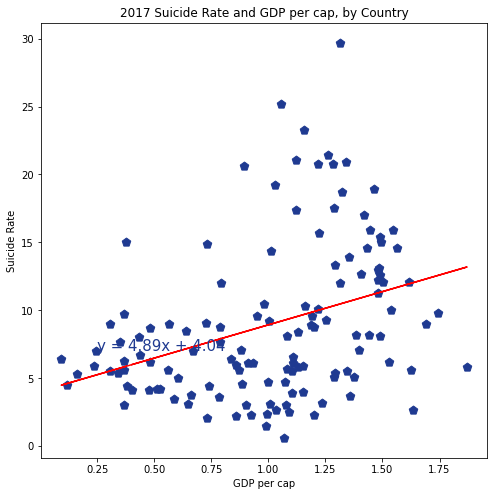

In [71]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy..GDP.per.Capita._17'], 
               mergedfinalfiltered['2017'])
plt.title('2017 Suicide Rate and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')
plt.savefig('2017 Suicide Rate and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

the r value: 0.339538


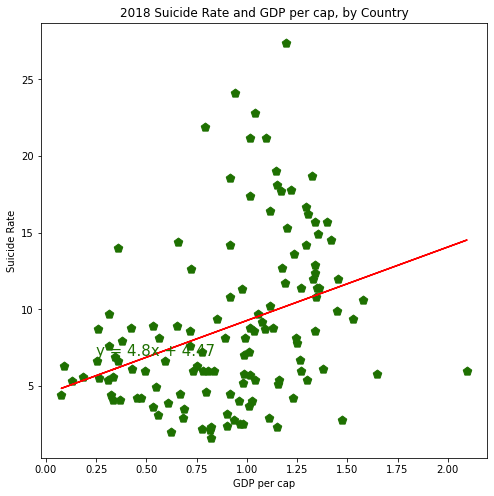

In [72]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['GDP per capita_18'], 
               mergedfinalfiltered['2018'])
plt.title('2018 Suicide Rate and GDP per cap, by Country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')
plt.savefig('2018 Suicide Rate and GDP per cap, by Country.png',dpi=300, bbox_inches = "tight")

## Observations on GDP per cap and Suicide Rate
* There are positive correlation, but again, they are weak correlation (around 0.33)
* The scatter plot show some upward patterns (not so clear)

## Note:
* find outliners, highest, lowest point of data
* look at the country that have highest rate of suicide
* Go the regions that contain the outliners, and take another look into that region
* inside the outliners, what are the common things that those outliners have? culture, life styles, ...

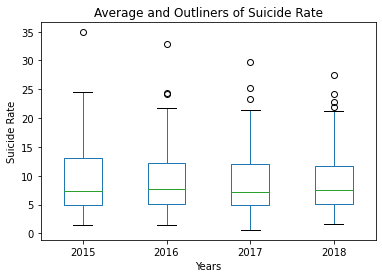

In [73]:
# boxplot for suicide rate for all the years
ax = mergedfinalfiltered[['2015','2016','2017','2018']].plot(kind='box', title='Average and Outliners of Suicide Rate')
plt.xlabel('Years')
plt.ylabel('Suicide Rate')
plt.savefig('Average and Outliners of Suicide Rate.png',dpi=300, bbox_inches = "tight")

In [74]:
summary_suicide = mergedfinalfiltered[['Country Name','Region_15','2015','2016','2017','2018']]

In [75]:
# Lithusnia is the country with highest suicide rate from 2015 to 2018, it's in Central and Eastern Europe Region
summary_suicide.loc[(summary_suicide['2015'] == summary_suicide['2015'].max()) |
                   (summary_suicide['2016'] == summary_suicide['2016'].max()) |
                   (summary_suicide['2015'] == summary_suicide['2015'].max()) |
                   (summary_suicide['2015'] == summary_suicide['2015'].max())]

,Country Name,Region_15,2015,2016,2017,2018
70,Lithuania,Central and Eastern Europe,34.9,32.8,29.7,27.4


In [76]:
#Jordan is the country with lowest suicide rate, it's Middle East and Northern Africa Region
summary_suicide.loc[(summary_suicide['2015'] == summary_suicide['2015'].min()) |
                   (summary_suicide['2016'] == summary_suicide['2016'].min()) |
                   (summary_suicide['2015'] == summary_suicide['2015'].min()) |
                   (summary_suicide['2015'] == summary_suicide['2015'].min())]

,Country Name,Region_15,2015,2016,2017,2018
60,Jordan,Middle East and Northern Africa,1.5,1.5,1.5,1.6


## Let's look a bit deeper into the region with those highest and lowest countries

In [77]:
central_east_europe= mergedfinalfiltered.loc[mergedfinalfiltered['Region_15'] == 'Central and Eastern Europe']
central_east_europe= central_east_europe[['Country Name','2015','2016','2017','2018',
                                         'Happiness Score_15','Happiness Score_16','Happiness.Score_17','Score_18']]
central_east_europe= central_east_europe.drop(labels=70, axis=0)

the r value: 0.279538


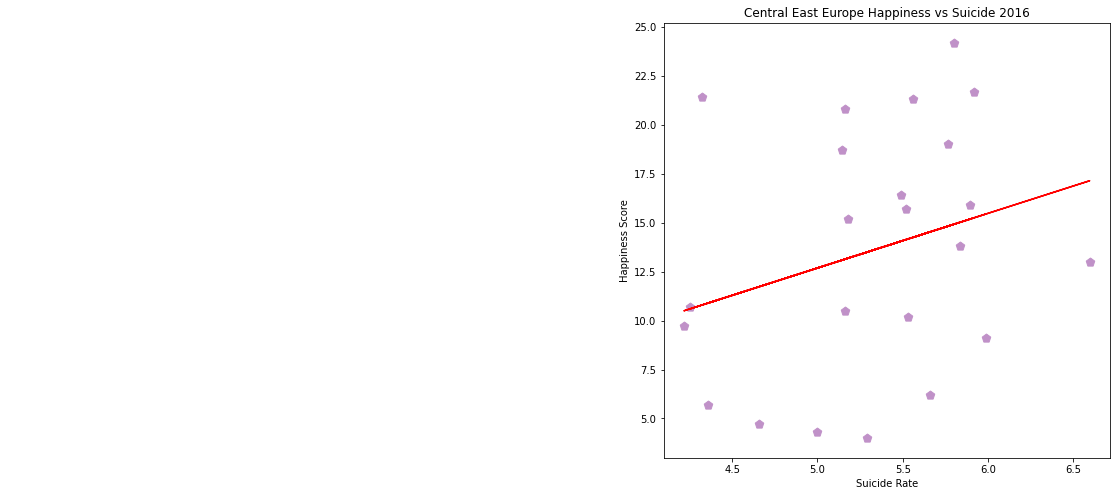

In [78]:
scater_regress(central_east_europe, central_east_europe['Happiness Score_16'], central_east_europe['2016'])
plt.title('Central East Europe Happiness vs Suicide 2016')
plt.xlabel('Suicide Rate')
plt.ylabel('Happiness Score')
plt.savefig('Central East Europe Happiness vs Suicide 2016.png',dpi=300, bbox_inches = "tight")

In [79]:
mid_east_north_africa = mergedfinalfiltered.loc[mergedfinalfiltered['Region_15'] == 'Middle East and Northern Africa']
mid_east_north_africa= mid_east_north_africa[['Country Name','2015','2016','2017','2018',
                                         'Happiness Score_15','Happiness Score_16','Happiness.Score_17','Score_18']]
mid_east_north_africa

,Country Name,2015,2016,2017,2018,Happiness Score_15,Happiness Score_16,Happiness.Score_17,Score_18
3,United Arab Emirates,6.5,6.0,5.6,6.0,6.901,6.573,6.648,6.774
15,Bahrain,7.4,7.7,8.1,8.6,5.960,6.218,6.087,6.105
34,Algeria,2.7,2.6,2.5,2.5,5.605,6.355,5.872,5.295
55,Iraq,4.1,4.0,3.9,3.7,4.677,4.575,4.497,4.456
57,Israel,4.5,5.2,5.1,5.4,7.278,7.267,7.213,6.814
60,Jordan,1.5,1.5,1.5,1.6,5.192,5.303,5.336,5.161
65,Kuwait,2.6,2.6,2.7,2.8,6.295,6.239,6.105,6.083
66,Lebanon,2.8,2.7,3.0,2.5,4.839,5.129,5.225,5.358
68,Libya,5.6,5.0,5.5,5.8,5.754,5.615,5.525,5.566
73,Morocco,7.4,7.2,7.1,7.2,5.013,5.151,5.235,5.254


the r value: 0.354775


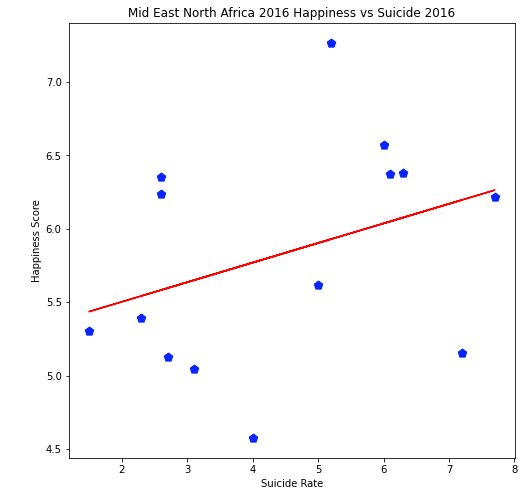

In [80]:
scater_regress(mid_east_north_africa, mid_east_north_africa['2016'], mid_east_north_africa['Happiness Score_16'])
plt.title('Mid East North Africa 2016 Happiness vs Suicide 2016')
plt.xlabel('Suicide Rate')
plt.ylabel('Happiness Score')
plt.savefig('Mid East North Africa 2016 Happiness vs Suicide.png',dpi=300, bbox_inches = "tight")